In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import wrangle as w

opening data from local file


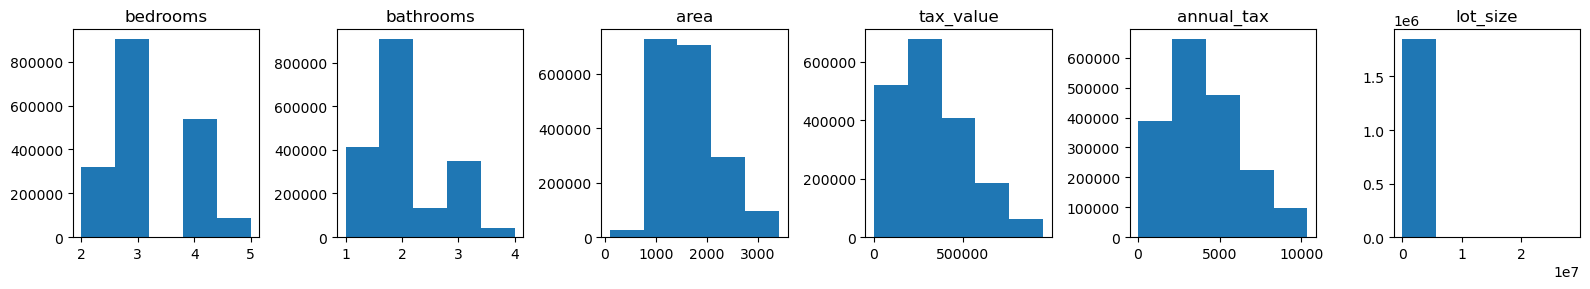

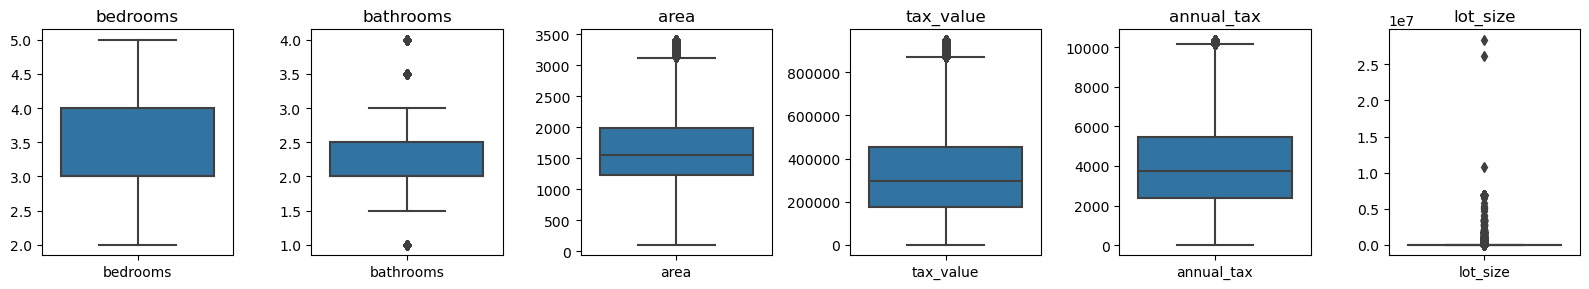

In [32]:
train, validate, test = w.wrangle_zillow()

In [38]:
df = w.acquire_zillow_sfr()

opening data from local file


In [ ]:
d

In [30]:
df.isna().sum()

bedrooms         11
bathrooms        11
area           8484
tax_value       493
year_built     9337
annual_tax     4442
fips              0
lot_size      13438
dtype: int64

In [25]:
len(df[df.lot_size > 100000])

14119

In [21]:
df.shape

(2152863, 8)

In [23]:
df[df.year_built.isna()== False].shape

(2143526, 8)

In [8]:
# df = df[df.lot_size < 100000]

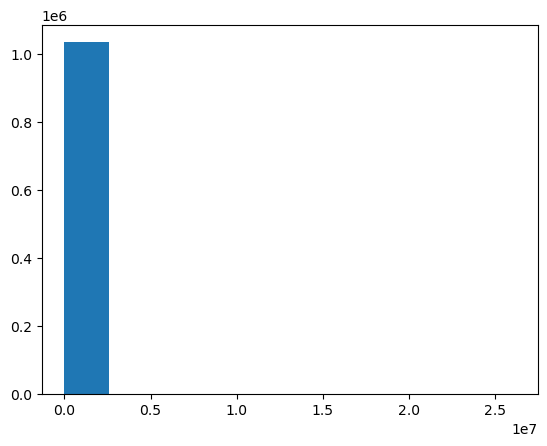

In [37]:
plt.hist(data=train,
         x='lot_size')
plt.show()

In [22]:
df[df.lot_size > 500000]

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips,lot_size
36,0.0,0.0,NaN,572080.0,NaN,6142.48,6111.0,892352.0
473,0.0,0.0,NaN,885558.0,NaN,9862.04,6111.0,729331.0
866,0.0,0.0,220.0,13840.0,1988.0,327.80,6037.0,595917.0
2306,0.0,0.0,1776.0,79574.0,1989.0,1137.90,6037.0,6971010.0
2313,0.0,0.0,352.0,25464.0,1948.0,415.92,6037.0,3510748.0
...,...,...,...,...,...,...,...,...
2145495,1.0,1.0,925.0,109000.0,1942.0,1489.49,6037.0,552040.0
2150157,1.0,1.0,1265.0,312070.0,1920.0,3527.26,6059.0,1267596.0
2152526,0.0,0.0,NaN,60630272.0,NaN,1337755.86,6059.0,735176.0
2152550,3.0,2.0,1228.0,152541.0,1999.0,1863.39,6037.0,6971010.0


In [11]:
11570 / 2143526

0.0053976485473001025

In [33]:
len(train) + len(validate) + len(test)

1847806

In [34]:
2152863 - (len(train) + len(validate) + len(test))

305057

In [35]:
(len(train) + len(validate) + len(test)) / 2152863

0.8583017126496205